# Applying Differential Privacy to Crime Dataset

Make a public crime dataset differentially private by adding noise, generalize the data.

# Differential Privacy

Like $k$-Anonymity, *differential privacy* is a formal notion of privacy. Unlike $k$-Anonymity, however, differential privacy is a property of *algorithms*, and not a property of *data*. That is, we can prove that an *algorithm* satisfies differential privacy; to show that a *dataset* satisfies differential privacy, we must show that the algorithm which produced it satisfies differential privacy.

The $\epsilon$ parameter in the definition is called the *privacy parameter* or the *privacy budget*. $\epsilon$ provides a knob to tune the "amount of privacy" the definition provides. Small values of $\epsilon$ require $F$ to provide *very* similar outputs when given similar inputs, and therefore provide higher levels of privacy; large values of $\epsilon$ allow less similarity in the outputs, and therefore provide less privacy. 

In our context, when calculating different parts of outputs, because the desired accuracy and privacy is different, the $\epsilon$ value is different too. 


## The Laplace Mechanism

Differential privacy is typically used to answer specific queries. 
The Laplace mechanism is a very popular algorithm in the practice of DP. The mechanism achieves privacy via output perturbation: perturbing the output with Laplacian noise. 

This data is scraped from the website of Columbus Police Department

Dataset source: https://columbuspolice.org/Reports/Results?from=11/1/2023&to=11/3/2023&loc=all&types=9

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
data = pd.read_csv("web_scraped_data.csv")

/var/folders/k8/264s7sns3jq750wnnzhvx2rr0000gn/T/ipykernel_19542/517456507.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [340]:
data.columns

Index(['CRNumber', 'Description', 'Victim', 'Reported', 'Location'], dtype='object')

### Obfuscate the CRNumber as it is an explicit identifier.

In [341]:
# copy the original data to avoid disturbing the original dataset
data_dp=data.copy()
data_dp['CRNumber'] = data['CRNumber'].apply(lambda x: x[:2] + '*' * 7 + x[9:])
data_dp['CRNumber'] 

0      23*******-001
1      23*******-001
2      23*******-001
3      23*******-001
4      23*******-001
           ...      
249    23*******-001
250    23*******-001
251    23*******-001
252    23*******-001
253    23*******-001
Name: CRNumber, Length: 254, dtype: object

### Get the number of reported crime cases by date

In [342]:
data.groupby('Reported').count()

,CRNumber,Description,Victim,Location
Reported,,,,
11/01/2023,104,104,104,104
11/02/2023,94,94,94,94
11/03/2023,56,56,56,56


### Add nosie to the case counts according to the date


In [355]:
epsilon = 0.1
sensitivity=1
november_first = data[data["Reported"]=="11/01/2023"].shape[0]
november_second = data[data["Reported"]=="11/02/2023"].shape[0]
november_third = data[data["Reported"]=="11/03/2023"].shape[0]
november_first_noise = round(november_first+ np.random.laplace(loc=0, scale=sensitivity/epsilon))
november_second_noise = round(november_second +  np.random.laplace(loc=0, scale=sensitivity/epsilon))
november_third_noise = round(november_third + np.random.laplace(loc=0, scale=sensitivity/epsilon))
print("November first now has", november_first_noise, "cases.")
print("November second now has", november_second_noise, "cases.")
print("November third now has", november_third_noise, "cases.")


November first now has 100 cases.
November second now has 97 cases.
November third now has 62 cases.


### Make a contrast graph

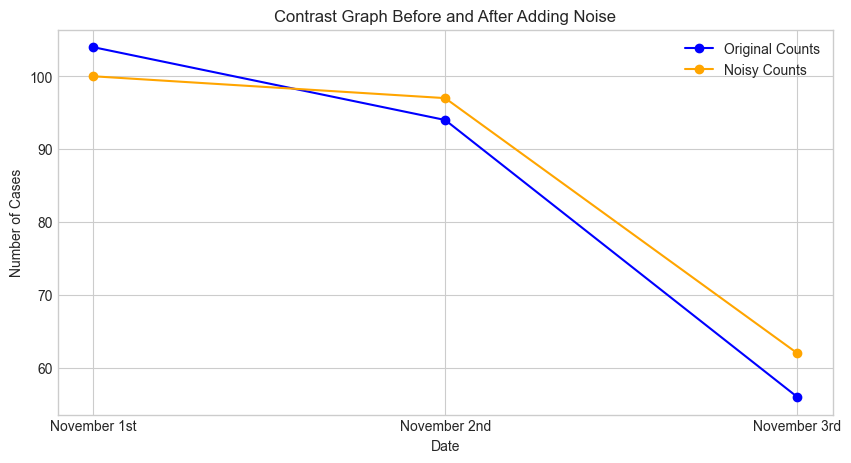

In [356]:
dates = ['November 1st', 'November 2nd', 'November 3rd']
original_counts = [november_first, november_second, november_third]
noisy_counts = [november_first_noise, november_second_noise, november_third_noise]

plt.figure(figsize=(10, 5))
plt.plot(dates, original_counts, marker='o', linestyle='-', color='blue', label='Original Counts')
plt.plot(dates, noisy_counts, marker='o', linestyle='-', color='orange', label='Noisy Counts')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Contrast Graph Before and After Adding Noise')
plt.legend()
plt.show()


### Get the number of reported crime cases by category

In [361]:
data.groupby('Description').count()

,CRNumber,Victim,Reported,Location
Description,,,,
101 - Burglary - Zone 1,5,5,5,5
102 - Burglary - Zone 2,3,3,3,3
103 - Burglary - Zone 3,4,4,4,4
104 - Burglary - Zone 4,1,1,1,1
107 - Felony Theft - Zone 1 -Generalist,1,1,1,1
107 - Felony Theft - Zone1 - Generalist,1,1,1,1
107 - Felony Theft -Zone 1 - Generalist,1,1,1,1
108 - Felony Theft - Zone 2 -Generalist,4,4,4,4
108 - Felony Theft - Zone 2- Generalist,1,1,1,1


### Count the number of occurrences for each category in the 'Description' column 

In [363]:

# Count the occurrences of each category in the 'Description' column
category_counts = data['Description'].value_counts()

# Print the results
print("Number of categories in the 'Description' column:", len(category_counts))
print("\nCategory counts:")
print(category_counts)

Number of categories in the 'Description' column: 54

Category counts:
Description
200 - Motor Vehicle Theft -Generalist                     24
254 - Assault - ZIU                                       24
550 - Trespassing - ZIU                                   22
255 - Menacing - ZIU                                      20
117 - Theft - From MotorVehicle - Felony - Generalist     16
551 - Criminal Damaging - ZIU                             13
117 - Theft - From Motor Vehicle - Felony - Generalist    11
400 - Fraud - Generalist                                  10
115 - Theft - Misdemeanor -ZIU                             9
551 - Criminal Damaging -ZIU                               6
200 - Motor Vehicle Theft- Generalist                      6
450 - Robbery                                              6
118 - Theft - From MotorVehicle - Petit - ZIU              6
115 - Theft -Misdemeanor - ZIU                             6
200a - Motor Vehicle Theft -ATTEMPT - Generalist           5
10

In [364]:
pairing_counts = data.groupby(['Description', 'Reported'])['Location'].nunique()

# Find the pairing with the highest and least number of unique 'user_id' values
highest_risk_pairing = pairing_counts.idxmax()


print(f"The pairing with the highest risk of de-anonymization is: {highest_risk_pairing}")

The pairing with the highest risk of de-anonymization is: ('200 - Motor Vehicle Theft -Generalist', '11/02/2023')


### Get the category where there was only one case

In [365]:
# create a list to store the categories where there is only one victim
unique_category = category_counts[category_counts == 1].index.tolist()
print("There are", len(unique_category), "unique categories where there was only one case.\n")
# Print the result
print("Categories with a count value of 1:\n")
for cat in unique_category:
    print(cat)


There are 25 unique categories where there was only one case.

Categories with a count value of 1:

109 - Felony Theft - Zone 3- Generalist
116 - Theft - Mail
302a - Molesting Vic 15 Yrand Younger
554 - Vandalism -Generalist
200a - Motor Vehicle Theft- ATTEMPT - Generalist
117 - Theft - From MotorVehicle - Felony -Generalist
108 - Felony Theft - Zone 2- Generalist
107 - Felony Theft - Zone 1 -Generalist
500 - Extortion
107 - Felony Theft - Zone1 - Generalist
302a - Molesting Vic 15 Yr and Younger
108 - Felony Theft - Zone2 - Generalist
104 - Burglary - Zone 4
300 - Rape/SexualAssault Vic 16 Yr andOlder
701 - Miscellaneous Off ense
552 - TelecommunicationHarassment - ZIU
305 - Voyeurism
117 - Theft - FromMotor Vehicle - Felony -Generalist
109 - Felony Theft -Zone 3 - Generalist
107 - Felony Theft -Zone 1 - Generalist
201 - Theft of LicensePlate - Generalist
109 - Felony Theft - Zone 3 - Generalist
201 - Theft of License Plate - Generalist
552 - Telecommunication Harassment - ZIU
302 - M

### Histograms

In our context, a *histogram* is an analysis of a dataset which splits the dataset into "bins" based on the value of one of the data attributes, and counts the number of rows in each bin. In order to make the data differentially private, we can add noise to the output of the category count using laplace in the numpy and random libraries. Define the epsilon to be 1, which is the privacy cost, we achieve some privacy and preserve certain accuracy.

In [368]:
epsilon = 1
# we will round the value and make sure there are no negative values to make it less suspiscious in post-processing
noisy_category_counts = data['Description'].value_counts() + np.random.laplace(loc=0, scale=1/epsilon)
print(noisy_category_counts)




Description
200 - Motor Vehicle Theft -Generalist                     24.39527
254 - Assault - ZIU                                       24.39527
550 - Trespassing - ZIU                                   22.39527
255 - Menacing - ZIU                                      20.39527
117 - Theft - From MotorVehicle - Felony - Generalist     16.39527
551 - Criminal Damaging - ZIU                             13.39527
117 - Theft - From Motor Vehicle - Felony - Generalist    11.39527
400 - Fraud - Generalist                                  10.39527
115 - Theft - Misdemeanor -ZIU                             9.39527
551 - Criminal Damaging -ZIU                               6.39527
200 - Motor Vehicle Theft- Generalist                      6.39527
450 - Robbery                                              6.39527
118 - Theft - From MotorVehicle - Petit - ZIU              6.39527
115 - Theft -Misdemeanor - ZIU                             6.39527
200a - Motor Vehicle Theft -ATTEMPT - Generalist  

### Get the count value by location
We can create a histogram that counts the number of cases reported in the dataset based on their location. 

In [369]:
data.dropna()
data['Location'].value_counts()

Location
4899 Sunbury Rd                      6
3588 Gender Rd                       5
3600 Morse Rd                        5
4263 GoldengateSq E Apt G            5
3675 W DublinGranville Rd            4
                                    ..
5682 Saranac Dr                      1
1098 LexingtonAve                    1
2466 N CassadyAve                    1
1801 Forest Oak Ln                   1
Mancana Ash Way AndPfeifer Ash Dr    1
Name: count, Length: 206, dtype: int64

### Add noise to the location using Laplace
Similarly, we can apply the Laplace Mechanism via parallel composition to all the 'Location' bins. The sensitivity value is still  1 and $\epsilon = 1$ 

In [371]:
epsilon = 1
data['Location'].value_counts().apply(lambda x: x + np.random.laplace(loc=0, scale=1/epsilon))

Location
4899 Sunbury Rd                      6.788801
3588 Gender Rd                       5.538384
3600 Morse Rd                        5.386039
4263 GoldengateSq E Apt G            2.146206
3675 W DublinGranville Rd            4.635837
                                       ...   
5682 Saranac Dr                      0.196746
1098 LexingtonAve                    0.875665
2466 N CassadyAve                    0.163612
1801 Forest Oak Ln                  -0.493955
Mancana Ash Way AndPfeifer Ash Dr    1.541694
Name: count, Length: 206, dtype: float64

### How to protect the individuals' privacy to prevent re-identification?
We already filtered those categories where there were only one case, which means there was only one particular victim. If we don't change the data, this will make re-identification fairly easy.Since we know how to ensure differential privacy for counting queries with the Laplace mechanism, we can do so for this query:


In [372]:

epsilon = 1

sensitivity =1

for category in unique_category:

   modified_count = data[data['Description'] == category].shape[0]+ np.random.laplace(loc=0, scale=sensitivity/epsilon)
   print(modified_count)



1.2602737846527456
1.3760645267361369
0.7003208138885284
1.3653771647193622
0.5318652203444161
1.649804231496602
1.4304259719814025
1.410386265313127
0.9049505487769918
1.3068681655247232
3.7895320656601914
0.24810217891754083
2.9157150074003093
2.059175253064164
2.847983423499721
0.6198423972003406
0.652026794595794
2.444545335618682
3.8474174540248556
1.8417462111584817
1.614616009648981
0.6121996778588409
1.5619692415143676
1.824020252615409
0.8554009092222674


## Create a new anonymized dataset
Now that we have achieved differential privacy when displaying the output, we can use the copy of the original dataset and publish an anonymized version of the dataset according to the mechanism we used above.

Mainly, we need to hide all the explicit identifiers such as CRNumber, Victim (names) by replacing the data with generalized information. Then, we need to make sure we change the category counts and date counts so that it satisfies the calculated results using Laplace mechanism. Finally, we need to make sure that the location is generalized too by hiding the last two digits of the street number.

### Define a function to genralize the street number

In [373]:
def generalize_street_number(address):
    parts = address.split()
    if len(parts) >= 2:
        street_number = parts[0]
        if street_number.isdigit():
            if len(street_number) > 2:
                generalized_number = street_number[:-2] + '**'
                parts[0] = generalized_number
                return ' '.join(parts)
            else:
                # Handle cases where street number has only two digits
                return '** ' + ' '.join(parts[1:])
    return address

### Use the function to generalize the Location in our dataset

In [374]:
data_dp['Location'] = data['Location'].apply(generalize_street_number)
data_dp.filter(['Location'])

,Location
0,1** - 140 District
1,11** Urana Ave
2,6** Gilbert St
3,52** Fall Water Ct
4,19** Drury Ln
...,...
249,10** Elizabeth Ave
250,72** E Broad St
251,58** W Broad St
252,14** E Mound St


### Replace all victim’s real names with the word “Victim”

In [375]:
data_dp['Victim'] = 'Victim'

### Post-Processing -- Modify the category counts while adding noise to the date
Since we have already completely anonymized the identifiers, and generalized the location in each case, we now need to achieve differential privacy to the unique cases where re-identification can easily be done.
First, in this part, we will use post-processing to make sure that the counts after we add noise are all integers to make it less suspicious. And for any negative count that we have, we simply make it equal to 0.
According to the mechanism we applied above, we change the reported crime counts by adding one to each category, this is particularly necessary for unique cases to avoid re-identification.

In [390]:

# Find categories with count equal to 1
new_unique_category = data_dp['Description'].value_counts()[data_dp['Description'].value_counts() == 1].index

# Duplicate the rows for each category with count equal to 1
# Duplicate the rows for each category with count equal to 1
for cat in new_unique_category:
    cat_rows = data_dp[data_dp['Description'] == cat]
    last_row_index = cat_rows.index[-1]
    duplicated_row = data_dp.loc[last_row_index].copy()  # Make a copy of the last row
    data_dp = pd.concat([data_dp.iloc[:last_row_index + 1], duplicated_row.to_frame().T, data_dp.iloc[last_row_index + 1:]], ignore_index=True)
print("The dataframe contains ",data_dp.shape[0]," rows.")
print("The dataframe contains ",data_dp.shape[1]," columns.")
data_dp.to_csv("anonymized_data.csv",index=False)

The dataframe contains  279  rows.
The dataframe contains  5  columns.


## Now when we see the category counts, the value changes.

In [391]:
newcategory_counts = data_dp['Description'].value_counts() 
print(newcategory_counts)

Description
254 - Assault - ZIU                                       24
200 - Motor Vehicle Theft -Generalist                     24
550 - Trespassing - ZIU                                   22
255 - Menacing - ZIU                                      20
117 - Theft - From MotorVehicle - Felony - Generalist     16
551 - Criminal Damaging - ZIU                             13
117 - Theft - From Motor Vehicle - Felony - Generalist    11
400 - Fraud - Generalist                                  10
115 - Theft - Misdemeanor -ZIU                             9
200 - Motor Vehicle Theft- Generalist                      6
115 - Theft -Misdemeanor - ZIU                             6
450 - Robbery                                              6
118 - Theft - From MotorVehicle - Petit - ZIU              6
551 - Criminal Damaging -ZIU                               6
101 - Burglary - Zone 1                                    5
200a - Motor Vehicle Theft -ATTEMPT - Generalist           5
118 - Theft 